<a href="https://colab.research.google.com/github/subair99/ML_Zoomcamp_2022/blob/main/ML_Zoomcamp_Session__6_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


### HOMEWORK
The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

You can take it from Kaggle or download using wget link mentioned below:

    wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [14]:
# IMPORTING LIBRARIES AND DEPENDENCIES:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

%matplotlib inline

In [15]:
# READING DATASET:
PATH = 'ML_Zoomcamp_Session_#6_data.csv'
select_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", 
               "total_bedrooms", "population", "households", 
               "median_income", "median_house_value", "ocean_proximity"]
df = pd.read_csv(PATH, usecols=select_cols)
df.total_bedrooms = df.total_bedrooms.fillna(0)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


1. Apply the log transform to median_house_value.
2. Do train/validation/test split with 60%/20%/20% distribution.
3. Use the train_test_split function and set the random_state parameter to 1.

In [17]:
# SPLITTING THE DATASET FOR TRAINING AND TEST:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Reset index
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

1. We will use DictVectorizer to turn train and validation into matrices.

In [18]:
# IMPLEMENTATION OF DICTVECTORIZER:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
val_test = df_val.to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)
X_val = dv.fit_transform(val_dict)
X_test = dv.fit_transform(val_dict)

### Question 1
1. Let's train a decision tree regressor to predict the median_house_value variable.

2. Train a model with max_depth=1.

In [19]:
# TRAINING THE REGRESSION MODEL:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [20]:
# INSPECTION:
print(export_text(dt, feature_names=dv.feature_names_))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



Answer: ocean_proximity=INLAND

### Question 2
Train a random forest model with these parameters:

1. n_estimators=10
2. random_state=1
3. n_jobs=-1 (optional-to make training faster)

In [25]:
# TRAINING RANDOM FOREST MODEL:
rf2 = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [29]:
# CALCULATING MEAN SQUARED ERROR:
rf2.fit(X_train, y_train)
pred_val = rf2.predict(X_val)
RMSE_val = np.sqrt(mean_squared_error(y_val, pred_val))
print('RMSE_val:', RMSE_val)

RMSE_val: 0.24543934797731562


What's the RMSE of this model on validation?

Answer: 0.25

### Question 3
Now, let's experiment with the n_estimators parameter.

1. Try different values of this parameter from 10 to 200 with step 10.
2. Set random_state to 1.
3. Evaluate the model on the validation dataset.

In [30]:
# TRAINING THE MODEL WITH n_estimators:
n_est = range(10, 201, 10)
scores_ne = []

for n in n_est:
  rf3 = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
  rf3.fit(X_train, y_train)

  pred_val = rf3.predict(X_val)
  RMSE_val = np.sqrt(mean_squared_error(y_val, pred_val))
  scores_ne.append((n, RMSE_val))

In [31]:
columns_ne = ['n_estimators', 'RMSE_ne']
df_scores_ne = pd.DataFrame(scores_ne, columns=columns_ne)
df_scores_ne.head()

,n_estimators,RMSE_ne
0,10,0.245439
1,20,0.238322
2,30,0.235694
3,40,0.234613
4,50,0.233247


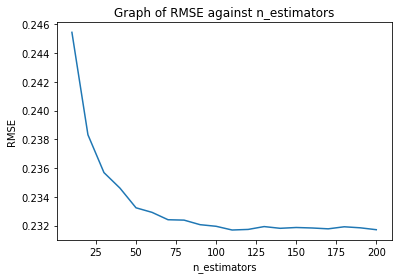

In [32]:
plt.plot(df_scores_ne.n_estimators, df_scores_ne.RMSE_ne)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('Graph of RMSE against n_estimators');

After which value of n_estimators does RMSE stop improving?

Answer: 70

### Question 4
Let's select the best max_depth:
1. Try different values of max_depth: [10, 15, 20, 25].
2. For each of these values, try different values of n_estimators from 10 till 200 (with step 10).
3. Fix the random seed: random_state=1.

In [33]:
scores = []

for d in tqdm([10, 15, 20, 25]):
    rf = RandomForestRegressor(n_estimators=0,
                               max_depth=d,
                               random_state=1, n_jobs=-1,
                               warm_start=True)

    for n in tqdm(range(10, 201, 10)):
        rf.n_estimators = n
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        score = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, score))

columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

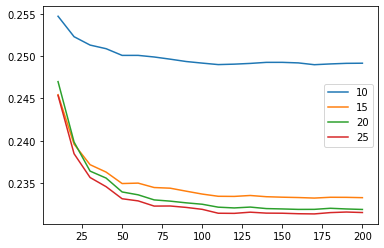

In [34]:
# PLOTTING THE GRAPH:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d)

plt.legend()
plt.show()

What's the best max_depth:

Answer: 25

### Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parametes:

1. n_estimators=10,
2. max_depth=20,
3. random_state=1,
4. n_jobs=-1 (optional)
5. Get the feature importance information from this model

In [36]:
# TRAINING THE RANDOM FOREST MODEL:
rf5 = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

rf5.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [37]:
# Get feature names from training data
features = dv.feature_names_
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [38]:
# Extract importances from model
importances = rf5.feature_importances_
importances

array([1.77047310e-02, 3.30905421e-02, 1.01323418e-01, 9.62187908e-02,
       3.63329094e-01, 2.01153429e-03, 3.10900841e-01, 3.56963420e-04,
       3.94636506e-04, 5.13756138e-03, 2.94174844e-02, 1.85852677e-02,
       2.15291344e-02])

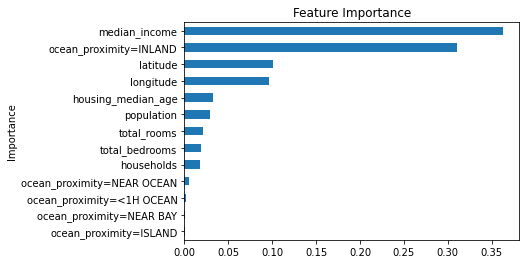

In [39]:
feat_imp = pd.Series(importances, index=features).sort_values(ascending=True)

# Plot the feature importances
feat_imp.plot(kind="barh", 
              xlabel="Importance", 
              ylabel="Feature", 
              title="Feature Importance");

What's the most important feature?

Answer: median_income

### Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost.
Create DMatrix for train and validation
Create a watchlist
Train a model with these parameters for 100 rounds:

In [40]:
# CREATING THE DMARTIX:
features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [41]:
def mse_calc(eta_value):
  
  xgb_params = {  
              'eta': eta_value,  
              'max_depth': 6,  
              'min_child_weight': 1,  

              'objective': 'reg:squarederror',
              'nthread': 8,

              'seed': 1,
              'verbosity': 1,
              }

  model = xgb.train(xgb_params, dtrain, num_boost_round=200)
  pred_val = model.predict(dval)
  mse = mean_squared_error(y_val, pred_val)

  return mse

In [42]:
mse_calc(0.3)

0.050531852552504745

Now, change eta first to 0.1 and then to 0.01.

Which eta leads to the best RMSE score on the validation dataset?

In [43]:
mse_calc(0.1)

0.05030006069615951

In [44]:
mse_calc(0.01)

2.52718013113913

Answer: Both give same